<a href="https://colab.research.google.com/github/rrankawat/deep-learning/blob/main/Perceptron_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
  )

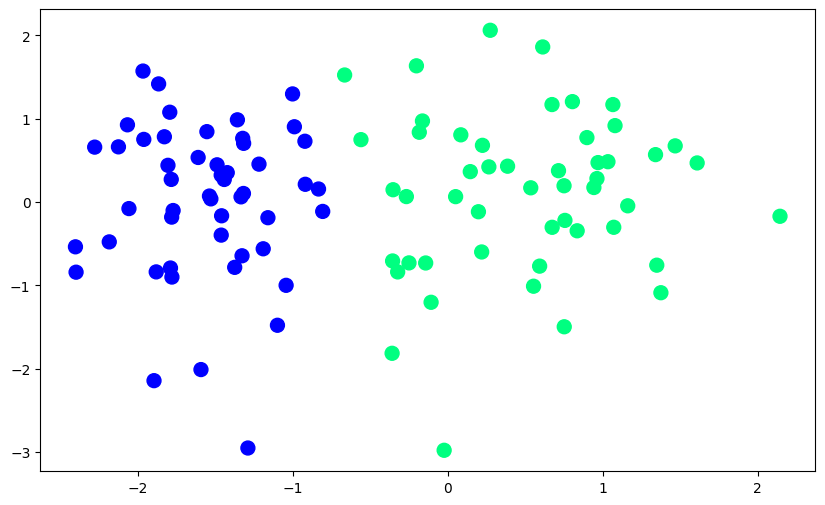

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [10]:
def perceptron(X, y):
  X = np.insert(X, 0, 1, axis=1) # To add 1 in the input as per theory!
  weights = np.ones(X.shape[1]) # [1, 1, 1]
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0, 100) # Random student
    y_hat = step(np.dot(X[j], weights)) # Model predicted via step function after dot product of (Wi.Xi)
    weights = weights + lr*(y[j] - y_hat) * X[j] # W(new)

  return weights[0], weights[1:]

In [7]:
def step(z):
  return 1 if z > 0 else 0

In [11]:
intercept_, coef_ = perceptron(X, y)

In [12]:
print(coef_)
print(intercept_)

[1.37110871 0.18810092]
0.9


In [13]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

(-3.0, 2.0)

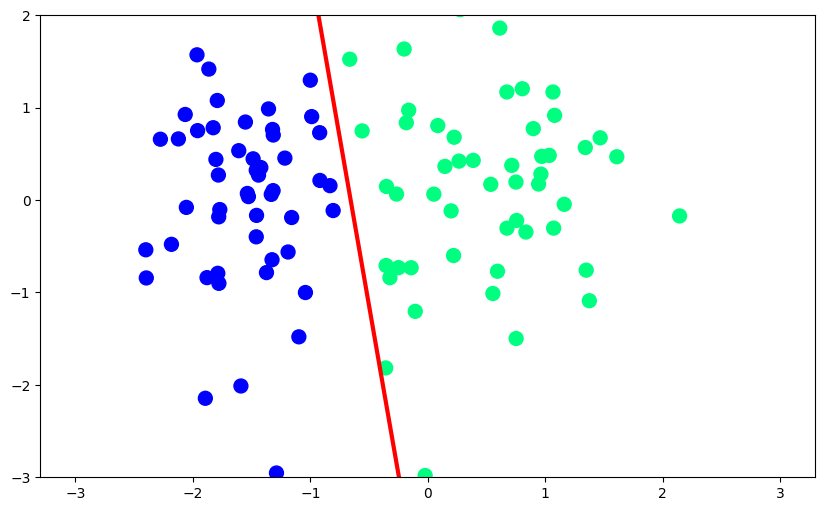

In [16]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)